In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('codon_usage.csv')
df = df[df['DNAtype']==0]   
df = df.drop(columns=['DNAtype'])
df = df[df['Kingdom']!='plm']

# Convert all numeric columns (codon frequencies) from string to float
# Identify columns that should be numeric (excluding metadata columns)
metadata_cols = ['SpeciesName', 'Kingdom']
for col in df.columns:
    if col not in metadata_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['Kingdom'].value_counts()

/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_84847/2400582308.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('codon_usage.csv')


Kingdom
bct    2918
vrl    2832
pln    1523
inv     922
vrt     464
phg     220
arc     126
mam     102
pri      83
rod      59
Name: count, dtype: int64

In [120]:
# Kingdom code to full name mapping
kingdom_names = {
    'arc': 'Archaea',
    'bct': 'Bacteria',
    'phg': 'Bacteriophage',
    'plm': 'Plasmid',
    'pln': 'Plant',
    'inv': 'Invertebrate',
    'vrt': 'Vertebrate',
    'mam': 'Mammal',
    'rod': 'Rodent',
    'pri': 'Primate',
    'vrl': 'Virus'
}

# flag = '4groups'
flag = 'ori'

if flag == '4groups':
    # Add full kingdom names to dataframe
    df['Taxon_group'] = df['Kingdom'].map(kingdom_names)
    animals = ['inv', 'vrt', 'mam', 'rod', 'pri']
    df['Taxon_group'] = df.apply(lambda row: 'Animal' if row['Kingdom'] in animals else row['Taxon_group'], axis=1)

    # Only keep some rows
    rows_to_keep = ['Animal','Plant','Bacteria','Virus']
    df = df[df['Taxon_group'].isin(rows_to_keep)]
    
elif flag == 'ori':
    df['Taxon_group'] = df['Kingdom'].map(kingdom_names)

df = df.drop(columns=['Kingdom'])
df['Taxon_group'].value_counts()

Taxon_group
Bacteria         2918
Virus            2832
Plant            1523
Invertebrate      922
Vertebrate        464
Bacteriophage     220
Archaea           126
Mammal            102
Primate            83
Rodent             59
Name: count, dtype: int64

In [121]:
# Summary Statistics on the Dataset

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Total number of samples: {len(df)}")
print(f"Total number of features: {df.shape[1]}")
print(f"\nDataset shape: {df.shape}")

# Kingdom distribution
print("\n" + "="*70)
print("KINGDOM DISTRIBUTION")
print("="*70)
kingdom_counts = df['Taxon_group'].value_counts()
print(kingdom_counts)
print(f"\nPercentage distribution:")
print((kingdom_counts / len(df) * 100).round(2))

# Metadata columns info
print("\n" + "="*70)
print("METADATA COLUMNS")
print("="*70)
metadata_cols_present = ['SpeciesID', 'Ncodons', 'SpeciesName']
metadata_cols_present = [col for col in metadata_cols_present if col in df.columns]
for col in metadata_cols_present:
    if col == 'Ncodons':
        print(f"\n{col} (sequence length statistics):")
        print(df[col].describe())
    elif col == 'SpeciesID':
        print(f"\n{col}: {df[col].nunique()} unique species")
    elif col == 'SpeciesName':
        print(f"\n{col}: {df[col].nunique()} unique species names")

# Codon frequency statistics
print("\n" + "="*70)
print("CODON FREQUENCY STATISTICS")
print("="*70)
# numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
metadata_numeric = ['SpeciesID', 'Ncodons', 'Kingdom', 'DNAtype', 'SpeciesName', 'Taxon_group', 'PC1', 'PC2', 'PC3']
codon_cols_stats = [col for col in df.columns if col not in metadata_numeric]
# convert all str to numeric
df[codon_cols_stats] = df[codon_cols_stats].apply(pd.to_numeric, errors='coerce')   

codon_stats = df[codon_cols_stats].describe()
max_of_max = df[codon_cols_stats].max().max()
print(f"Number of codon columns: {len(codon_cols_stats)}")
print(f"Max of max codon frequency across all codons: {max_of_max:.4f}")
print(f"\nCodon frequency statistics (across all {len(codon_cols_stats)} codons):")
print(codon_stats)

# Per-kingdom statistics
print("\n" + "="*70)
print("STATISTICS BY KINGDOM")
print("="*70)
for kingdom in sorted(df['Taxon_group'].unique()):
    kingdom_df = df[df['Taxon_group'] == kingdom]
    print(f"\n{kingdom}:")
    print(f"  Number of samples: {len(kingdom_df)}")
    print(f"  Mean sequence length: {kingdom_df['Ncodons'].mean():.1f}")
    print(f"  Std sequence length: {kingdom_df['Ncodons'].std():.1f}")
    codon_mean = kingdom_df[codon_cols_stats].mean().mean()
    codon_std = kingdom_df[codon_cols_stats].std().mean()
    print(f"  Mean codon frequency: {codon_mean:.4f}")
    print(f"  Mean codon std: {codon_std:.4f}")

# Missing values check and removal
print("\n" + "="*70)
print("MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values detected!")
else:
    print("Missing values before removal:")
    print(missing[missing > 0])
    rows_before = len(df)
    df = df.dropna()
    rows_after = len(df)
    print(f"\nRemoved {rows_before - rows_after} rows with missing values")
    print(f"Dataset shape after removal: {df.shape}")


DATASET OVERVIEW
Total number of samples: 9249
Total number of features: 68

Dataset shape: (9249, 68)

KINGDOM DISTRIBUTION
Taxon_group
Bacteria         2918
Virus            2832
Plant            1523
Invertebrate      922
Vertebrate        464
Bacteriophage     220
Archaea           126
Mammal            102
Primate            83
Rodent             59
Name: count, dtype: int64

Percentage distribution:
Taxon_group
Bacteria         31.55
Virus            30.62
Plant            16.47
Invertebrate      9.97
Vertebrate        5.02
Bacteriophage     2.38
Archaea           1.36
Mammal            1.10
Primate           0.90
Rodent            0.64
Name: count, dtype: float64

METADATA COLUMNS

SpeciesID: 9249 unique species

Ncodons (sequence length statistics):
count    9.249000e+03
mean     1.091810e+05
std      8.472369e+05
min      1.000000e+03
25%      1.797000e+03
50%      3.560000e+03
75%      1.305400e+04
max      4.066258e+07
Name: Ncodons, dtype: float64

SpeciesName: 9237 unique 

In [122]:
df['Taxon_group'].value_counts()

Taxon_group
Bacteria         2917
Virus            2831
Plant            1523
Invertebrate      922
Vertebrate        464
Bacteriophage     220
Archaea           126
Mammal            102
Primate            83
Rodent             59
Name: count, dtype: int64

In [123]:
df.to_csv('preprocessed.csv', index=False)

---

Found 64 codon columns
Sample codons: ['UUU', 'UUC', 'UUA', 'UUG', 'CUU']

Explained variance ratio: [0.38470363 0.07116743]
Total variance explained: 45.59%


/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_84847/3148080018.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


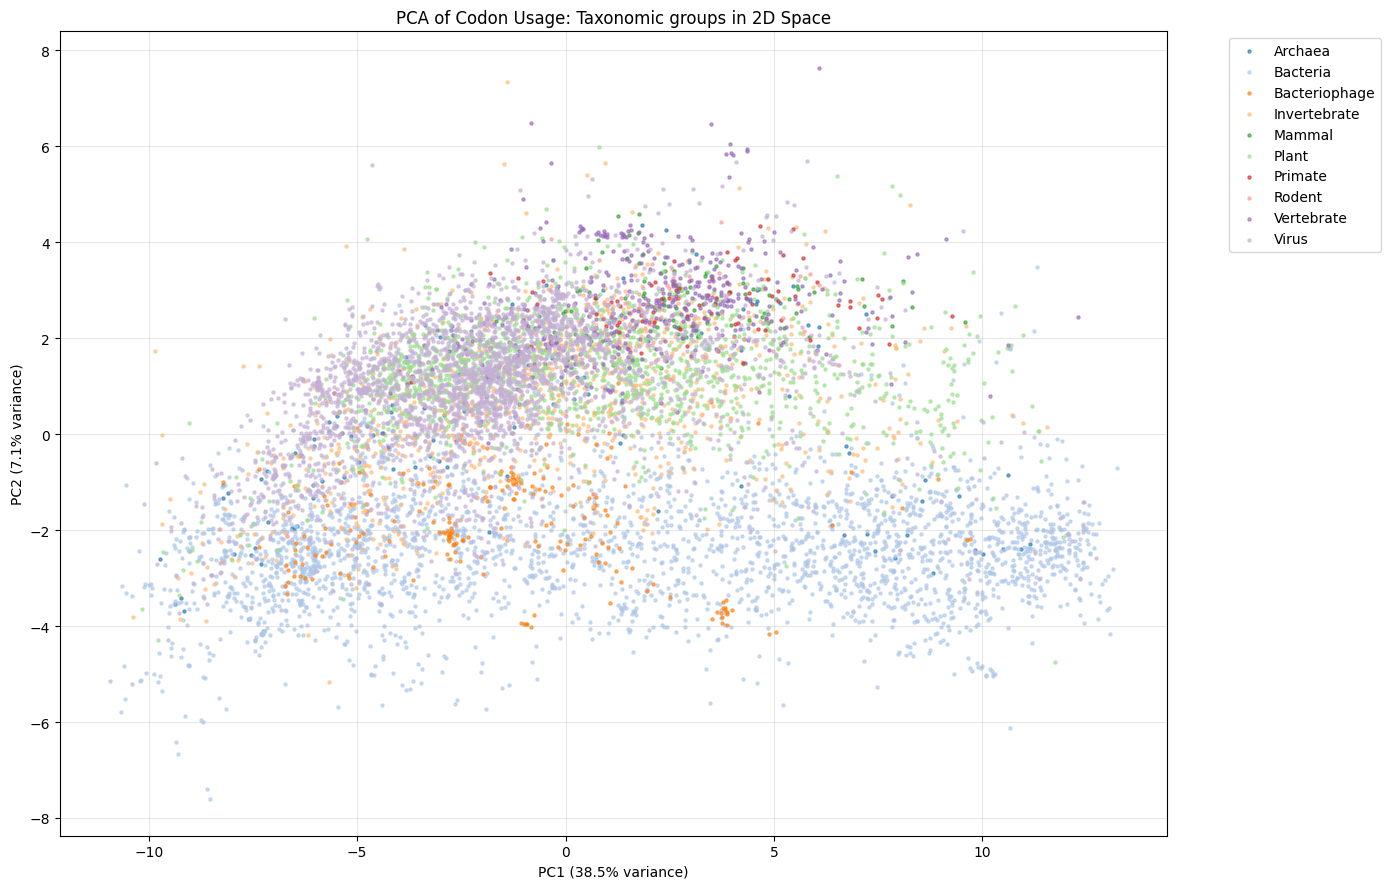

In [124]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove metadata numeric columns like SpeciesID, Ncodons, DNAtype
codon_cols = codon_cols_stats
print(f"Found {len(codon_cols)} codon columns")
print(f"Sample codons: {codon_cols[:5]}")

# Prepare data for PCA
X = df[codon_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components back to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Visualize the clustering by Kingdom (use explicit colors for consistency)
plt.figure(figsize=(14, 9))
# Define a color mapping for every taxa present in Taxon_group
# Use a categorical colormap and assign one color per unique taxon
taxa = sorted(df['Taxon_group'].unique())
import matplotlib as mpl
from matplotlib import cm
# choose a qualitative colormap with enough distinct colors (tab20, tab20b, tab20c)
cmap = cm.get_cmap('tab20')
colors = [mpl.colors.to_hex(cmap(i % cmap.N)) for i in range(len(taxa))]
kingdom_colors = dict(zip(taxa, colors))
# keep plotting order consistent with taxa list
kingdoms = taxa

for kingdom in kingdoms:
    color = kingdom_colors.get(kingdom, 'lightgray')
    mask = df['Taxon_group'] == kingdom
    plt.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], 
                label=kingdom, alpha=0.6, s=5, color=color)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA of Codon Usage: Taxonomic groups in 2D Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


3D PCA Explained variance ratio: [0.38470363 0.07116743 0.04997021]
Total variance explained: 50.58%


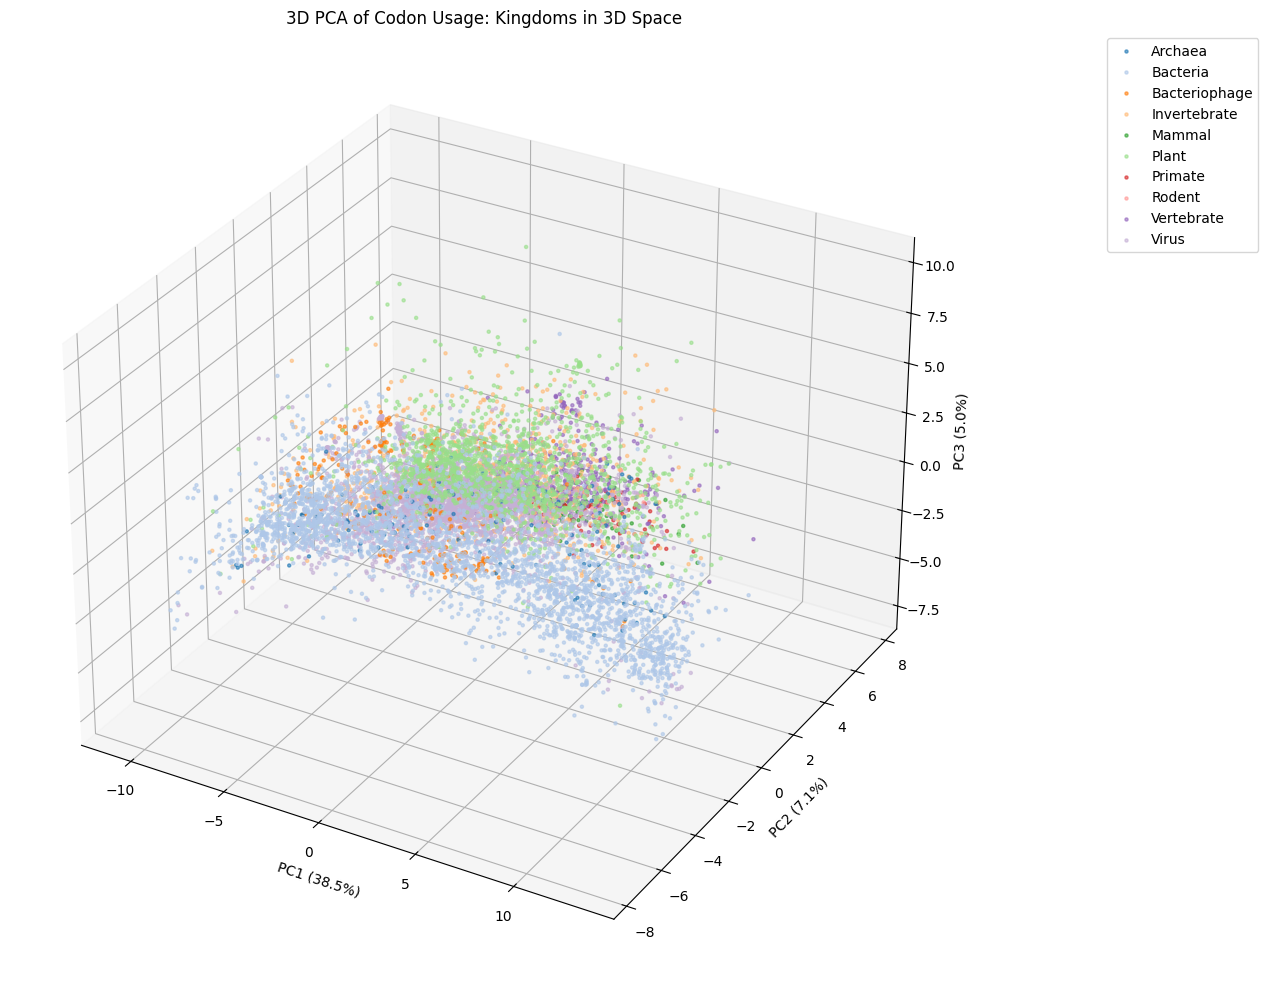

In [125]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add PC3 to dataframe
df['PC3'] = X_pca_3d[:, 2]

print(f"3D PCA Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_3d.explained_variance_ratio_.sum():.2%}")

# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for kingdom in kingdoms:
    mask = df['Taxon_group'] == kingdom
    color = kingdom_colors.get(kingdom, 'lightgray')
    ax.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], df.loc[mask, 'PC3'],
               label=kingdom, alpha=0.6, s=5, color=color)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title('3D PCA of Codon Usage: Kingdoms in 3D Space')
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


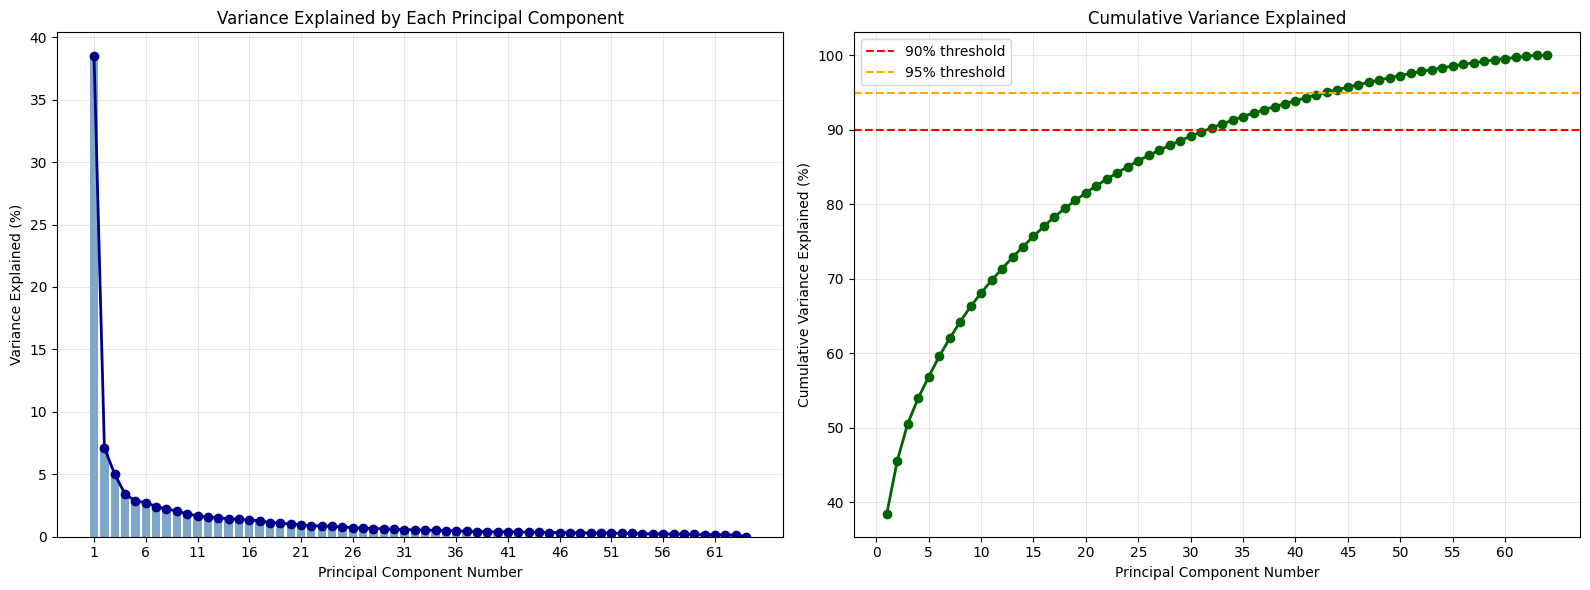

Total number of components: 64

Top 5 components explain: 56.85%
Top 10 components explain: 68.12%

Components needed for 90% variance: 32
Components needed for 95% variance: 43


In [126]:
# Scree Plot: Variance Explained vs PC Number
# Fit PCA with all components to see full variance distribution
pca_full = PCA()
pca_full.fit(X_scaled)

# Create scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Variance explained by each PC
pc_numbers = range(1, len(pca_full.explained_variance_ratio_) + 1)
ax1.bar(pc_numbers, pca_full.explained_variance_ratio_ * 100, alpha=0.7, color='steelblue')
ax1.plot(pc_numbers, pca_full.explained_variance_ratio_ * 100, 'o-', color='darkblue', linewidth=2)
ax1.set_xlabel('Principal Component Number')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('Variance Explained by Each Principal Component')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, len(pc_numbers) + 1, 5))  # Show first 20 PCs on x-axis

# Plot 2: Cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
ax2.plot(pc_numbers, cumulative_variance, 'o-', color='darkgreen', linewidth=2)
ax2.axhline(y=90, color='r', linestyle='--', label='90% threshold')
ax2.axhline(y=95, color='orange', linestyle='--', label='95% threshold')
ax2.set_xlabel('Principal Component Number')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xticks(range(0, len(pc_numbers) + 1, 5))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total number of components: {len(pca_full.explained_variance_ratio_)}")
print(f"\nTop 5 components explain: {cumulative_variance[4]:.2f}%")
print(f"Top 10 components explain: {cumulative_variance[9]:.2f}%")

# Find how many components needed for 90% and 95% variance
n_90 = np.argmax(cumulative_variance >= 90) + 1
n_95 = np.argmax(cumulative_variance >= 95) + 1
print(f"\nComponents needed for 90% variance: {n_90}")
print(f"Components needed for 95% variance: {n_95}")


In [ ]:
# Virus Host Classification (with API key + backoff)
import requests
import time
from urllib.parse import quote
from tqdm import tqdm

# Filter virus data
virus_df = df[df['Taxon_group'] == 'Virus'].copy()
print(f"Total viruses in dataset: {len(virus_df)}")
print(f"\nVirus SpeciesIDs (txids): {virus_df['SpeciesID'].values[:10]}...")

# Configure Entrez identification and optional API key
TOOL = 'compmethods_js4872'   # set your tool name
EMAIL = 'you@example.com'     # set your email (NCBI recommends this)
API_KEY = ''                  # set your NCBI API key here to increase quota (optional)

# Helper: robust fetch with retries, exponential backoff, and Retry-After support
def fetch_taxonomy(txid, retries=5, backoff=1.0):
    """Fetch taxonomy XML for a txid from NCBI with retry/backoff handling.
    Raises RuntimeError after retries fail or on non-retriable HTTP status codes.
    """
    base = ("https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
            "?db=taxonomy&rettype=xml&retmode=xml")
    # include id param and optional tool/email/api_key
    url = f"{base}&id={quote(str(txid))}&tool={TOOL}&email={EMAIL}"
    if API_KEY:
        url += f"&api_key={API_KEY}"

    attempt = 0
    wait = backoff
    last_exc = None
    while attempt < retries:
        attempt += 1
        try:
            resp = requests.get(url, timeout=15)
            status = resp.status_code
            if status == 200:
                return resp.text
            if status == 429:
                # Too Many Requests - check Retry-After header
                retry_after = resp.headers.get('Retry-After')
                if retry_after:
                    try:
                        wait_time = float(retry_after)
                    except Exception:
                        wait_time = wait
                    time.sleep(wait_time)
                else:
                    time.sleep(wait)
                    wait *= 2
                last_exc = RuntimeError(f"HTTP 429 on attempt {attempt} for txid {txid}")
                continue
            # Other non-200 responses: treat as fatal (do not retry)
            raise RuntimeError(f"NCBI API returned status {status} for txid {txid}")

        except requests.RequestException as e:
            last_exc = e
            # transient network error: backoff and retry
            time.sleep(wait)
            wait *= 2
            continue
    # exhausted retries
    raise RuntimeError(f"Failed to fetch taxonomy for txid {txid} after {retries} attempts") from last_exc

# Function to classify host using species name first, then NCBI taxonomy as fallback
def get_virus_host(txid, species_name):
    """
    Determine host type for a virus: 'plant', 'animal', 'bacteria', or 'unknown'.
    This will raise RuntimeError if fetch_taxonomy fails after retries so the batch stops.
    """
    name_lower = str(species_name).lower()

    # Quick name-based checks (fast, no network)
    if any(k in name_lower for k in ['bacteriophage', 'phage', 'cyanophage']):
        return 'bacteria'

    plant_keywords = ['plant', 'potato', 'tomato', 'tobacco', 'rice', 'wheat', 'corn', 'maize',
                      'bean', 'pepper', 'cassava', 'citrus', 'apple', 'grape', 'lettuce', 'cabbage',
                      'brome', 'barley', 'oat', 'sugarcane', 'clover']
    if any(k in name_lower for k in plant_keywords):
        return 'plant'

    animal_keywords = ['human', 'mammal', 'rodent', 'mouse', 'rat', 'rabbit', 'cat', 'dog', 'primate',
                       'monkey', 'ape', 'cattle', 'bovine', 'swine', 'porcine', 'sheep', 'goat',
                       'bird', 'avian', 'poultry', 'chicken', 'duck', 'insect', 'mosquito', 'fly',
                       'bat', 'lion', 'elephant', 'horse', 'equine', 'feline', 'canine']
    if any(k in name_lower for k in animal_keywords):
        return 'animal'

    # Fallback: query NCBI taxonomy (may raise RuntimeError if fetch fails)
    xml_text = fetch_taxonomy(txid)
    xml_lower = xml_text.lower()

    if 'bacteriophage' in xml_lower or 'phage' in xml_lower:
        return 'bacteria'
    if 'plant' in xml_lower:
        return 'plant'
    if any(k in xml_lower for k in ['animal', 'mammal', 'insect', 'vertebrate']):
        return 'animal'

    return 'unknown'

# Classify viruses by host with progress bar
print("\nClassifying viruses by host (using species name + NCBI taxonomy with backoff)...")

tqdm.pandas(desc="Processing viruses")
# This will stop and raise if fetch_taxonomy fails after retries
virus_df['Host'] = virus_df.progress_apply(
    lambda row: get_virus_host(row['SpeciesID'], row.get('SpeciesName', '')),
    axis=1
)

# Count by host type
host_counts = virus_df['Host'].value_counts()
print("\n" + "="*70)
print("VIRUS HOST CLASSIFICATION")
print("="*70)
print(host_counts)
print(f"\nPercentage distribution:")
print((host_counts / len(virus_df) * 100).round(2))

# Show some examples
print("\n" + "="*70)
print("EXAMPLES BY HOST TYPE")
print("="*70)
for host in ['bacteria', 'plant', 'animal', 'unknown']:
    host_virus_df = virus_df[virus_df['Host'] == host]
    if len(host_virus_df) > 0:
        print(f"\n{host.upper()} viruses ({len(host_virus_df)}):")
        print(host_virus_df[['SpeciesID', 'SpeciesName']].head(3))


Total viruses in dataset: 2831

Virus SpeciesIDs (txids): [100217 100220 100755 100880 100887 101029 101688 101764 101947  10249]...

Classifying viruses by host (using species name + NCBI taxonomy with backoff)...


Processing viruses: 100%|██████████| 2831/2831 [23:18<00:00,  2.02it/s]


VIRUS HOST CLASSIFICATION
Host
unknown     1606
animal       761
plant        459
bacteria       5
Name: count, dtype: int64

Percentage distribution:
Host
unknown     56.73
animal      26.88
plant       16.21
bacteria     0.18
Name: count, dtype: float64

EXAMPLES BY HOST TYPE

BACTERIA viruses (5):
     SpeciesID    SpeciesName
525     128708     His1 virus
526     128710     His2 virus
984     222645  Halovirus HF1

PLANT viruses (459):
    SpeciesID                   SpeciesName
2      100755  Sweet potato leaf curl virus
6      101688  Apple latent spherical virus
34     103722         Grapevine fleck virus

ANIMAL viruses (761):
    SpeciesID               SpeciesName
5      101029  Human adenovirus type 7d
15      10266            Sheeppox virus
16      10272      Rabbit fibroma virus

UNKNOWN viruses (1606):
   SpeciesID                              SpeciesName
0     100217  Epizootic haematopoietic necrosis virus
1     100220                         Bohle iridovirus
3     100

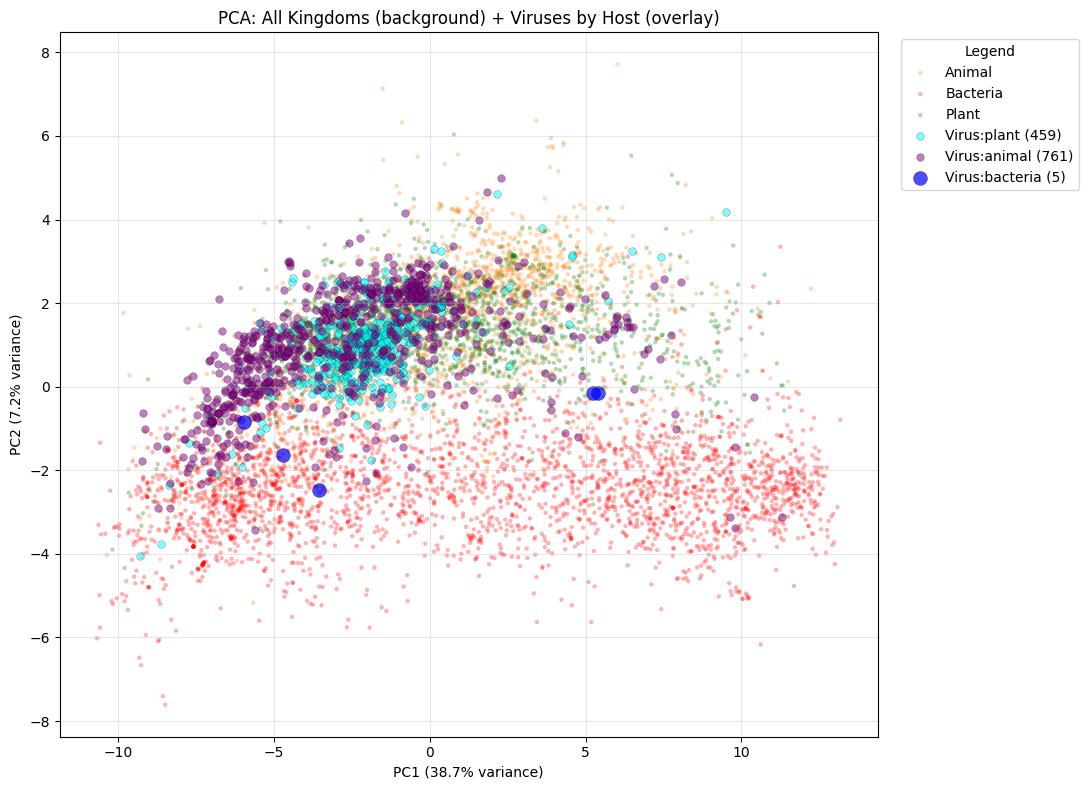

In [ ]:
# Plot: PCA (PC1 vs PC2) showing other kingdoms and viruses by host\n
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11, 8))

other_kingdoms = [k for k in sorted(df['Taxon_group'].unique()) if k != 'Virus']
for k in other_kingdoms:
    mask = df['Taxon_group'] == k
    if mask.sum() == 0:
        continue
    plt.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'],
                s=10, alpha=0.3, label=k, color=kingdom_colors.get(k, 'lightgray'), edgecolors='none')

# Overlay viruses colored by host classification
hosts = ['plant', 'animal', 'bacteria', 'unknown']
# Map virus host labels to the same base colors when applicable
host_colors = {'plant': 'cyan', 'animal': 'purple', 'bacteria': 'blue', 'unknown': 'gray'}
for h in hosts:
    sub = virus_df[virus_df['Host'] == h]
    if len(sub) == 0:
        continue
    # make unknowns faint to emphasize classified hosts
    alpha = 0.5
    # size = 25 if h == 'unknown' else 50
    size = 30
    if h == 'unknown':
        continue
    if h == 'bacteria':
        alpha = 0.7
        size = 100
    plt.scatter(sub['PC1'], sub['PC2'], s=size, alpha=alpha,
                label=f"Virus:{h} ({len(sub)})", color=host_colors.get(h, 'gray'), edgecolor='k', linewidths=0.3)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: All Kingdoms (background) + Viruses by Host (overlay)')
# Place legend outside the plot
plt.legend(title='Legend', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Classes: ['Archaea', 'Bacteria', 'Bacteriophage', 'Invertebrate', 'Mammal', 'Plant', 'Primate', 'Rodent', 'Vertebrate', 'Virus']
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best params: {'knn__n_neighbors': 1, 'pca__n_components': 64} | Best CV balanced_accuracy: 0.748
Test accuracy: 0.916 | Test balanced_accuracy: 0.766

Classification report:
               precision    recall  f1-score   support

      Archaea       0.86      0.81      0.83        31
     Bacteria       0.95      0.97      0.96       737
Bacteriophage       0.86      0.76      0.81        55
 Invertebrate       0.87      0.79      0.83       223
       Mammal       0.50      0.48      0.49        25
        Plant       0.88      0.93      0.90       387
      Primate       0.50      0.78      0.61        18
       Rodent       0.40      0.33      0.36        12
   Vertebrate       0.85      0.85      0.85       127
        Virus       0.97      0.95      0.96       695

     accuracy             

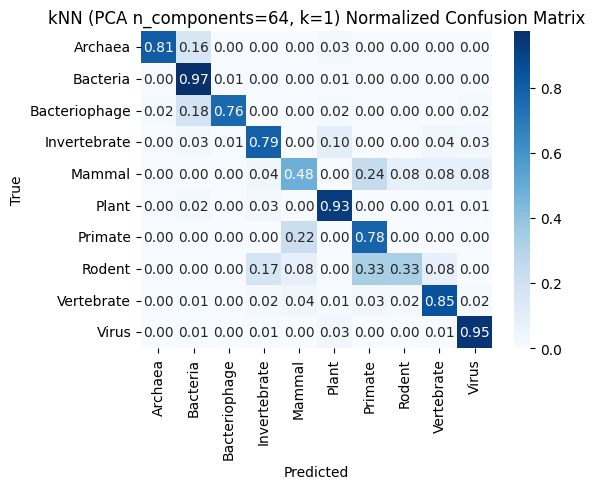

5-fold CV balanced_accuracy (best estimator): 0.756 ± 0.023


In [128]:
# kNN classification using the first 30 PCA components
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare raw features and target (we will fit scaler and PCA inside a pipeline to avoid leakage)
X_raw = df[codon_cols].values
y = df['Taxon_group'].values

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
print('Classes:', list(le.classes_))

from sklearn.model_selection import GroupShuffleSplit
# Use the Names as groups. This ensures 'Escherichia coli O157' 
# (all 4 copies) go together into EITHER train OR test.
groups = df['SpeciesName'].values 

gss = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
train_idx, test_idx = next(gss.split(X_raw, y_enc, groups=groups))

X_train, X_test = X_raw[train_idx], X_raw[test_idx]
y_train, y_test = y_enc[train_idx], y_enc[test_idx]

# Pipeline: scaler -> PCA -> kNN (n_components will be set by GridSearch)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

# Grid: vary PCA components (2..30) and k (odd 1..49)
param_grid = {
    'pca__n_components': [2,4,8,16,32,64],
    'knn__n_neighbors': list(range(1, 500, 10))
}

# Grid search (balanced accuracy to account for class imbalance)
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print(f'Best params: {gs.best_params_} | Best CV balanced_accuracy: {gs.best_score_:.3f}')

# Evaluate on test set
best = gs.best_estimator_
y_pred = best.predict(X_test)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Test accuracy: {acc:.3f} | Test balanced_accuracy: {bal_acc:.3f}')
print('\nClassification report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix (normalized)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f"kNN (PCA n_components={gs.best_params_.get('pca__n_components')}, k={gs.best_params_.get('knn__n_neighbors')}) Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

# Cross-validated balanced accuracy for the selected estimator (pipeline includes scaler+PCA)
cv_bal = cross_val_score(best, X_raw, y_enc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
print(f'5-fold CV balanced_accuracy (best estimator): {cv_bal.mean():.3f} ± {cv_bal.std():.3f}')


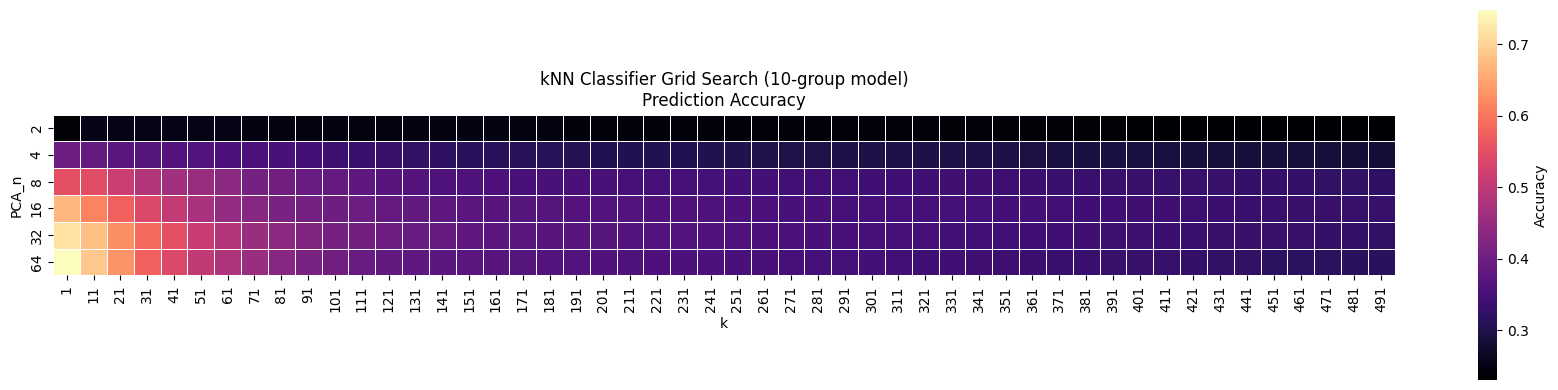

In [131]:
# Heatmap of GridSearchCV results (mean test balanced_accuracy)
import pandas as pd
# Build a tidy dataframe from gs.cv_results_
rows = []
for p, mean in zip(gs.cv_results_['params'], gs.cv_results_['mean_test_score']):
    rows.append({'PCA_n': p['pca__n_components'], 'k': p['knn__n_neighbors'], 'mean_test': mean})
df_gs = pd.DataFrame(rows)
# Sort and pivot so rows are PCA component counts and columns are k values
df_gs = df_gs.sort_values(['PCA_n', 'k']).reset_index(drop=True)
pivot = df_gs.pivot(index='PCA_n', columns='k', values='mean_test')
# Plot heatmap: size the figure so each grid cell is square
nrows, ncols = pivot.shape
cell_size = 0.35  # size of each cell in inches (adjustable)
fig_w = max(6, cell_size * ncols)
fig_h = max(4, cell_size * nrows)

# Optionally show the same heatmap with a different colormap (also square)
try:
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = sns.heatmap(pivot, cmap='magma', cbar_kws={'label': 'Accuracy'}, square=True, linewidths=0.5, linecolor='white')
    if flag == '4groups':
        brac = '(4-group model)'
    else:
        brac = '(10-group model)'
    ax.set_title(f'kNN Classifier Grid Search {brac}\nPrediction Accuracy')
    plt.tight_layout()
    plt.show()
except Exception:
    pass


cv accuracy per k: 100%|██████████| 50/50 [00:25<00:00,  1.98it/s]



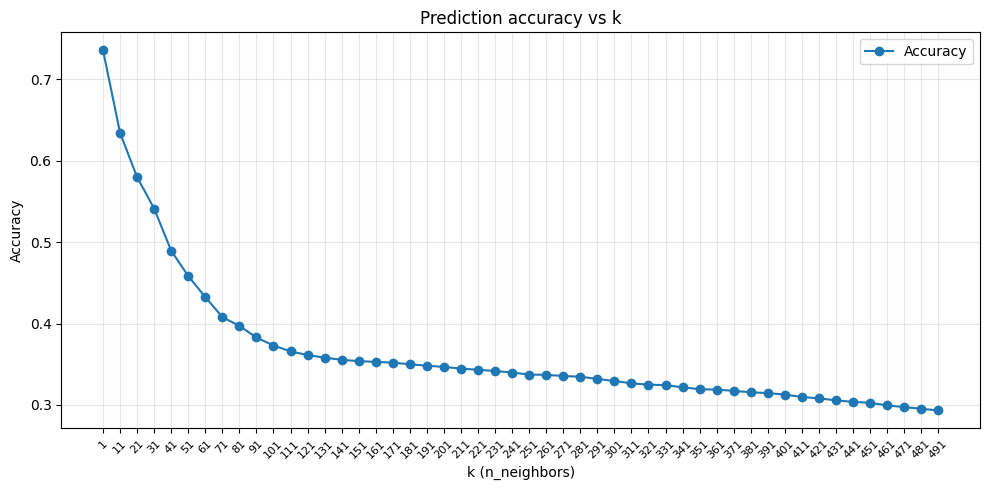


Top 5 by balanced_accuracy:
    k  balanced  accuracy
0   1  0.735531  0.898327
1  11  0.633986  0.881166
2  21  0.579748  0.860766
3  31  0.541015  0.842202
4  41  0.489343  0.828818

Top 5 by accuracy:
    k  balanced  accuracy
0   1  0.735531  0.898327
1  11  0.633986  0.881166
2  21  0.579748  0.860766
3  31  0.541015  0.842202
4  41  0.489343  0.828818


In [114]:
# Line plot: accuracy vs k for PCA n_components=64 (no PCA-equivalent)
import pandas as pd
from tqdm import tqdm

# Rebuild tidy DataFrame from GridSearch results
rows = [{'pca_n': p['pca__n_components'], 'k': p['knn__n_neighbors'], 'mean_test': m}
        for p, m in zip(gs.cv_results_['params'], gs.cv_results_['mean_test_score'])]
df_gs = pd.DataFrame(rows)

# Filter for PCA n_components == 64 (treat as 'no PCA' per notebook convention)
if 64 in df_gs['pca_n'].unique():
    df_64 = df_gs[df_gs['pca_n'] == 64].sort_values('k')
else:
    max_n = int(df_gs['pca_n'].max())
    print(f'Note: pca__n_components=64 not found in GridSearch; using {max_n} instead')
    df_64 = df_gs[df_gs['pca_n'] == max_n].sort_values('k')

k_values = df_64['k'].values
balanced_scores = df_64['mean_test'].values

# Compute standard accuracy via cross_val_score for each k (PCA n_components=64)
accuracy_scores = []
for k in tqdm(k_values, desc='cv accuracy per k'):
    est = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=64)),
        ('knn', KNeighborsClassifier(weights='distance', n_neighbors=int(k)))
    ])
    scores = cross_val_score(est, X_raw, y_enc, cv=5, scoring='accuracy', n_jobs=-1)
    accuracy_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, balanced_scores, marker='o', label='Accuracy')
# plt.plot(k_values, accuracy_scores, marker='s', label='accuracy (5-fold CV)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('Prediction accuracy vs k')
plt.xticks(k_values, rotation=45, fontsize=8)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show top-performing k by balanced and accuracy
res_df = pd.DataFrame({'k': k_values, 'balanced': balanced_scores, 'accuracy': accuracy_scores})
print('\nTop 5 by balanced_accuracy:')
print(res_df.sort_values('balanced', ascending=False).head())
print('\nTop 5 by accuracy:')
print(res_df.sort_values('accuracy', ascending=False).head())
